In [36]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import TensorDataset, DataLoader

# Recurrent neural networks

Lets generate the movement of a spring

In [37]:
import numpy as np
import torch

np.random.seed(2)

T = 20
L = 1000
N = 100

x = np.empty((N, L), 'int64')
x[:] = np.array(range(L)) + np.random.randint(-4 * T, 4 * T, N).reshape(N, 1)
data = np.sin(x / 1.0 / T).astype('float32')

In [38]:
data.shape

(100, 1000)

In [39]:
X0 = data[:, :-10]
Y0 = data[:, 10:]

In [40]:
# randomize the data
dataloader = DataLoader(TensorDataset(
    torch.from_numpy(X0).reshape(X0.shape[0], X0.shape[1], -1), 
    torch.from_numpy(Y0).reshape(Y0.shape[0], Y0.shape[1], -1)), batch_size=10, 
                        shuffle=True)

In [41]:
# Flattens the dimensions of a convolutional network
class CustomLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers=1):
        super(CustomLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers)

    def forward(self, x):
        output, _ = self.lstm(x)
        return output

In [50]:
model = nn.Sequential(CustomLSTM(1, 20), nn.Linear(20, 1))

In [51]:
num_epochs = 10

In [52]:
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

Epoch [1/10], Step [10/10], Loss: 0.4142
Epoch [2/10], Step [10/10], Loss: 0.2871
Epoch [3/10], Step [10/10], Loss: 0.1241
Epoch [4/10], Step [10/10], Loss: 0.1354
Epoch [5/10], Step [10/10], Loss: 0.1143
Epoch [6/10], Step [10/10], Loss: 0.1145
Epoch [7/10], Step [10/10], Loss: 0.1204
Epoch [8/10], Step [10/10], Loss: 0.1172
Epoch [9/10], Step [10/10], Loss: 0.1155
Epoch [10/10], Step [10/10], Loss: 0.1189


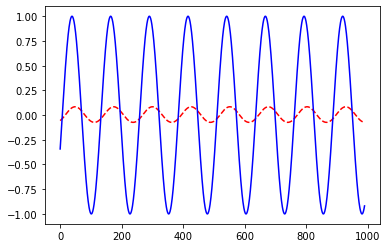

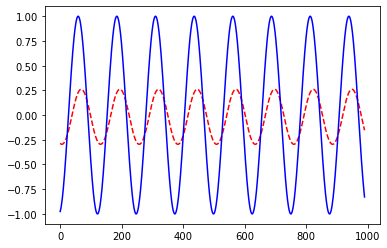

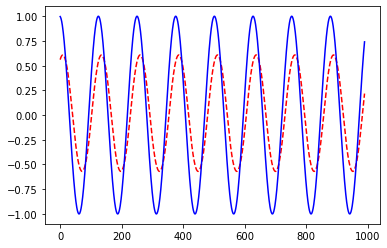

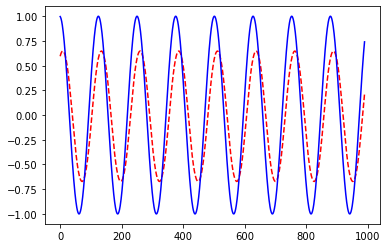

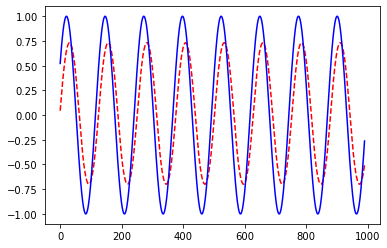

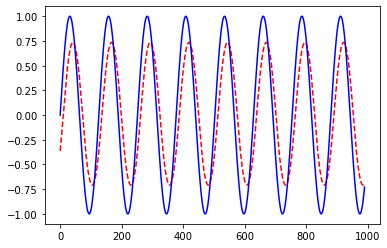

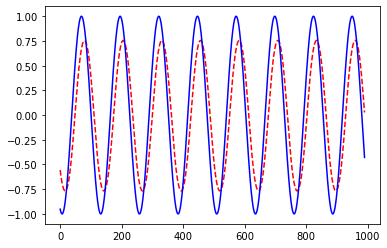

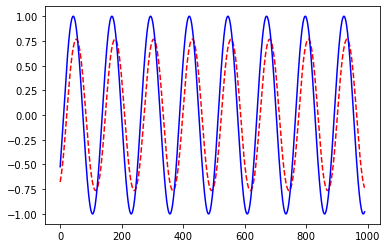

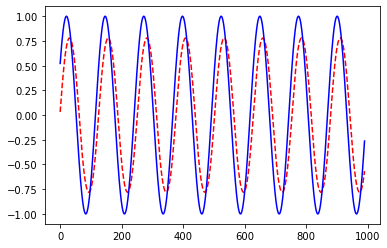

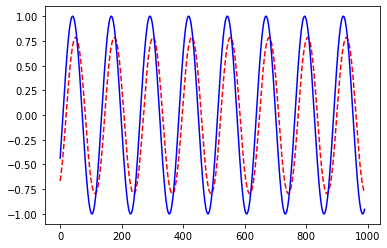

<Figure size 432x288 with 0 Axes>

In [53]:
# Train the model
total_step = len(dataloader)
loss_list = []
acc_list = []
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(dataloader):
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss_list.append(loss.item())
        
        # Backprop and perform Adam optimisation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i + 1) % 10 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item())
                 )
            plt.plot(model(inputs)[0, :, 0].detach().numpy(), 'r--')
            plt.plot(labels[0, :, 0].detach().numpy(), 'b');
            plt.figure()